In [30]:
from netCDF4 import Dataset #Reading NetCDF files
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import *
from pylab import *
import matplotlib.ticker as mticker
from IPython.display import display, clear_output
import datetime

year_list = [1987,1988] #this will be expanded upon but it will be two year interval for now

#in full code, this will be a giant for loop for individual series plots
for i in range(len(year_list)-1):
    ds1 = xr.open_dataset("/erai/"+str(year_list[i])+"/u."+str(year_list[i])+".nc",decode_times=False)
    ds2 = xr.open_dataset("/erai/"+str(year_list[i+1])+"/u."+str(year_list[i+1])+".nc",decode_times=False)

#avg daily wind at 60 degrees north (so need to avg all u values at 60 for lon on single time)
#need to produce 2d array that is DOY by mean wind at 10hPa 60 N 

In [31]:
##Calculate daily avg u wind at 60 N across all lons for first year measured
def yr1daily_avg(DOY):
    Z0 = np.array(ds1.isel(time = DOY, lev=31, lat = 60).u) #wind at 0Z, 60N, 10hPa
    Z6 = np.array(ds1.isel(time = DOY+1, lev=31, lat = 60).u) #wind at 6Z, 60N, 10hPa
    Z12 = np.array(ds1.isel(time = DOY+2, lev=31, lat = 60).u) #wind at 12Z, 60N, 10hPa
    Z18 = np.array(ds1.isel(time = DOY+3, lev=31, lat = 60).u) #wind at 18Z, 60N, 10hPa
    avg = (Z0+Z6+Z12+Z18)/4
    average = np.mean(avg) #avg across all longitudes
    return(average)

##Calculate daily avg v wind at 60 N across all lons for second year measured
def yr2daily_avg(DOY):
    Z0 = np.array(ds2.isel(time = DOY, lev=31, lat = 60).u)
    Z6 = np.array(ds2.isel(time = DOY+1, lev=31, lat = 60).u)
    Z12 = np.array(ds2.isel(time = DOY+2, lev=31, lat = 60).u)
    Z18 = np.array(ds2.isel(time = DOY+3, lev=31, lat = 60).u)
    avg = (Z0+Z6+Z12+Z18)/4
    average = np.mean(avg)
    return(average)

#separate loops for each year to establish lists of values from appropriate dates


#years
year1 = [x for x in range(728,len(np.array(ds.isel(lev=31).u))-4,4)]#July 1 to the end
year2 = [x for x in range(0,728,4)] #first to july first

values = []
date = []
for i in range(len(year1)):
    dt = year1[i]/4
    date.append(dt)
    dayavg = yr1daily_avg(year1[i])
    values.append(dayavg)

for i in range(len(year2)):
    dt = year2[i]/4
    date.append(dt)
    dayavg = yr2daily_avg(year2[i])
    values.append(dayavg)

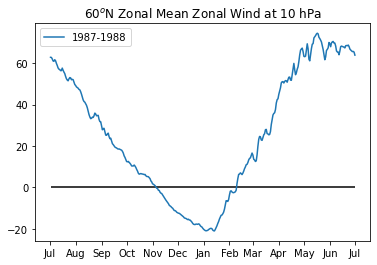

In [41]:
#begin plot 
#make note of year values again

# Generate some random date-time data
base = datetime.datetime(year_list[0],7,1,0,0)
date_list = [base - datetime.timedelta(days=x) for x in range(0, len(date))]

# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

plt.title ("60$^o$N Zonal Mean Zonal Wind at 10 hPa")
plt.plot(date_list,values,label = str(year_list[0])+"-"+str(year_list[1]))
plt.hlines(0, date_list[0],date_list[-1], colors='k', linestyles='solid')
plt.legend()
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.show()